<a href="https://colab.research.google.com/github/hhshawks75/MachineLearning/blob/master/Resampling%2CModelEvaluation%2CFeatureSelectionandRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 4 - INTRO TO MACHINE LEARNING | Resampling, Model Evaluation, Feature Selection and Regularization


> **FULL MARKS = 160**





1.2. Leave-One-Out Cross Validation(LOOCV) | SCORE : 


**Note:** To submit the assignment, please follow the same steps and in assignments 1, 2, & 3.

In this assignment we will use things we have learned from previous exercises. You will not be given instructions on how to load data, plot data, standardize/normalize data, how to write functions and many more. You will be given instructions on what you will be doing. **SO PLEASE START THIS ASSIGNMENT AS EARLY AS POSSIBLE**

1. **Resampling Methods | SCORE : 40**
  
  **1.1 K-Fold Cross Validation**
      
    References
    > Please follow lecture notes

  **1.2 Leave-One-Out Cross Validation(LOOCV) | SCORE :**
      
    References
    > Please follow lecture notes


2. **Model Evaluation | SCORE : 35**
  
  **2.1 Confusion Matrix:**
      
    References
    > Please follow references on previous assignments

  **2.2 Metrics : Accuracy, Precision, Recall, F1-Score and ROC-Curve**
      
    References
    > https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    > https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0
    > https://www.daniweb.com/programming/computer-science/tutorials/520084/understanding-roc-curves-from-scratch

3. **Linear Model Selection | SCORE : 40**
  
  **3.1 Subset Feature Selection**
      
    References
    > https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset#

  **3.2 Forward stepwise feature selection**
      
    References
    > Please follow lecture ntoes

4. **Model Regularization | SCORE : 45**
  
  **4.1 Ridge Regression - L2 Rgularization**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

  **4.2 Lasso Regression - L1 Regularization**
      
    References
    > https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html


### 1. Resampling Methods
---



---



In [ ]:
# Required Library are loaded for you
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,8

In [ ]:
# The following base class ResamplingMethods is implemented
# You will implemenet KFold and LOOCV class by inheriting this base class
# To make your work simpler we will show you a simple example 
# by inheriting this class to make validation set resampling method22

In [ ]:
class ResamplingMethods(object):
  def __init__(self, sklearn_databunch = load_iris(), test_size = 0.2, val_size = 0.2):
    """
    :param dict sklearn_databunch: a databunch or dictionary that contains keys(data, target, feature_names, target_names, DESCR)
    :param float test_size: This represent percentage of data size to be selected as test set from given data
    :param float val_size: This represent percentage of data size to be selected as validation set from given data
    :return None
    """
    # Data Initialization
    self.__x = preprocessing.scale(sklearn_databunch.get('data'))
    self.__y = sklearn_databunch.get('target')
    self.xlabel = sklearn_databunch.get('feature_names')
    self.ylabel = sklearn_databunch.get('target_names')
    self.description = sklearn_databunch.get('DESCR')

    self.test_size = test_size
    self.val_size = val_size
    
    # Do train-test split here
    # Please note one important remark here
    # self.xtest and self.ytest will be untouched and will be used only in final step of model validation
    # To implement resampling methods we will further split self.xtrain and self.ytrain into train and val set
    # So we can have different train-val set throughout different resampling implementation
    # Howevere, our test set will be keep fixed, this is our FINAL CHECK,
    # If our model doesn't perform well on FINAL_CHECK, 
    # i.e, for perfect case(note that accuracy is acceptable), test_accuracy>=val_accuracy>train_accuracy
    self.xtrain, self.xtest, self.ytrain, self.ytest = train_test_split(self.__x, 
                                                                        self.__y, 
                                                                        test_size=self.test_size, 
                                                                        random_state=4347)
    
    self.record = {'data':[],'accuracy':[],'loss':[],}
  
  # Create_model creates a logistic regression model with random state of our course_id
  def create_model(self,**kwargs):
    # Classifier Initialization
    self.model = LogisticRegression(random_state=4347)

  # If you print an instance of this class it will print description of the dataset
  def __repr__(self):
    return self.description
  
  # Run corresponding resampling methods implemented in inherited classes
  def run(self,**kwargs):
    return getattr(self,self.method)()

  # Calculate and return logistic between y and y_(predicted values of y given x)
  def logistic_loss(self,x,y):
    """
    :param ndarray x: input to model
    :param ndarray y: true label
    :return float: logistic_loss
    """
    y_hat = self.model.predict_proba(x)
    y = np.eye(len(self.ylabel))[y]
    return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
  
  def predict(self,*X):
    """
    :param tuple of ndarray X: X contains number of different x's eg.X may be xtrain only or (xtrain,xval,xtest)
    :return list of ndarray: if X contains more than one x(i.e, xtrain,xval,xtest) returns list of [ytrain_predicted, yval_predicted,ytest_predicted]
    """
    return [*map(lambda x:self.model.predict(x),X)]
  
  def accuracy(self,*XY):
    """
    :params pair tuple of ndarray XY: eg. ((xtrain,ytrain),(xval,yval),(xtest,ytest))
    :return list of accuracy: eg.[train_accuracy,val_accuracy,test_accuracy]
    """
    return [*map(lambda xy:self.model.score(*xy),XY)]
  
  def loss(self,*XY):
    """
    :params pair tuple of ndarray XY: eg. ((xtrain,ytrain),(xval,yval),(xtest,ytest))
    :return list of loss: eg.[train_loss,val_loss,test_loss]
    """
    return [*map(lambda xy:self.logistic_loss(*xy),XY)]

  def fitmodel(self,xtrain, ytrain, **kwargs):
    """
    :param ndarray xtrain: input to model
    :param ndarray ytrain: true label
    """
    self.create_model()
    self.model.fit(xtrain, ytrain)

  def get_report(self):
    """
    calculate average loss and accuracy 
    """
    report = self.record.groupby(['data']).mean()[['accuracy','loss']]
    report['method'] = self.method
    return report

  def visualize(self, **kwargs):
    """
    :param dict kwargs:contain argument for plotting
    """
    config = dict(data=self.record, 
                  x=self.method, 
                  y="accuracy", 
                  hue="data", 
                  size="loss",
                  sizes=(40, 400),
                  alpha=.5,
                  aspect=3)
    config.update(**kwargs)
    sns.relplot(**config)
    plt.title(f'Visualization for CV Method : {self.method}')

In [ ]:
# The following is a simple implementation of Validation Set Approach
# Please follow the lecture notes in given references to understand the validation set approach
# We will now create a class ValidationSet by inheriting Base Class ResamplingMethods
# We need to implement two important functions here
# Function train_val_split will return xtrain,xval,ytrain,yval
# Function valset will perfom 3 important tasks
                  # 1. Create a record instance, which will keep track of accuracy and loss and finally convert this instance to DataFrame
                  # 2. Fit N random steps (in each step we do random train_test split which you can see in function train_val_split, without specifying random_state)
                  # 3. Calculate Accuracy
# All other methods will be reused from base class(you can think of this as an extension class to base)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

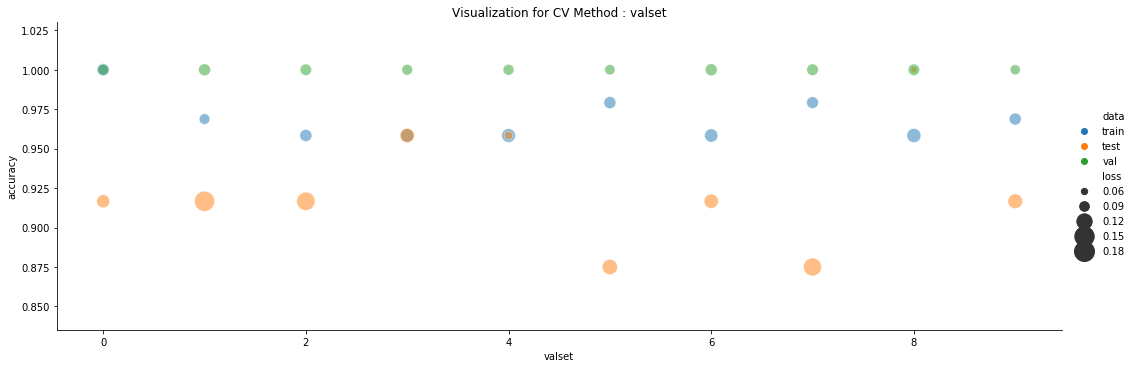

In [ ]:
class ValidationSet(ResamplingMethods):
  def __init__(self,fit_steps = 10):
    """
    :params int fit_steps: This is a number of times model needs to fit with random split of data(except test) to xtrain and val set
    """
    super(ValidationSet, self).__init__()
    self.fit_steps = fit_steps
    self.method = 'valset'

  def train_val_split(self, **kwargs):
    """
    :params ndarray x: x is a feature that should be splitted into further train-val sets
    :params ndarray y: x is a label that should be splitted into further train-val sets
    :return tuples of ndarray
    """
    x = kwargs.get('x', self.xtrain)
    y = kwargs.get('y', self.ytrain)
    xtrain, xval, ytrain, yval = train_test_split(x,y,test_size = self.val_size, random_state = kwargs.get('random_state'))
    return xtrain, xval, ytrain, yval

  def valset(self,**kwargs):
    self.record.update({self.method:[]})
    # Run fit_steps time
    # Each time perform split on self.xtrain and self.ytrain to produce xtrain,xval,ytrain,yval
    # Each time fit new model with xtrain,ytrain]
    # Calculate accuracy on (xtrain,ytrain),(xval,yval),(self.xtest,self.ytest)
    # Calculate loss on (xtrain,ytrain),(xval,yval),(self.xtest,self.ytest)
    # Record all metrics
    # After done convert record into dataframe, which will be used for visualization
    for i in range(self.fit_steps):
      xtrain, xval, ytrain, yval = self.train_val_split(**kwargs)
      self.fitmodel(xtrain,ytrain)
      self.record['data'].extend(['train','test','val'])
      self.record['accuracy'].extend(self.accuracy((xtrain, ytrain),(xval,yval),(self.xtest,self.ytest)))
      self.record['loss'].extend(self.loss((xtrain, ytrain),(xval,yval),(self.xtest,self.ytest)))
      self.record[self.method].extend([i]*3)

    self.record = pd.DataFrame(self.record)

# Now here Lets Create an instance of validation set with fit steps = 10
vs = ValidationSet(fit_steps = 10)
# Lets see the data description
print(vs)
# Now run this model
vs.run()
# Now Let us Visualize this model
vs.visualize()

***EXERCISE NO. 1***

  > **Task-1 | Score : 10** 

In [ ]:
# Now you will implement KFold Methods
# Please follow the lecture notes in the given references to understand how KFold set approach
# You will now create a class KFold by inheriting Base Class ResamplingMethods
# You need to implement two important function here, First two function are implemented for you
                  # 1. create_k_slices : This function will take k,N(optional, default : length of self.xtrain),window(optional, default : length of self.xtrain // k)
                                         # and return list of slices, eg. for k = 10, and length of self.train=120, [slice(0,12),slice(12,24),.....,slice(108,120)]
                  # 2. get_kth_mask : This function will take k, which represents train_val set of kth fold and return train_mask and val_mask
                  # 3. train_val_split : This function will take k, which represents train_val set of kth fold, calculate masks and return xtrain,xval,ytrain,yval
                  # 4. kfold : this function will run a loop k steps, each steps fit model on kth fold and record results and finally replace record as dataframe
# Now fill empty code section wherever asked

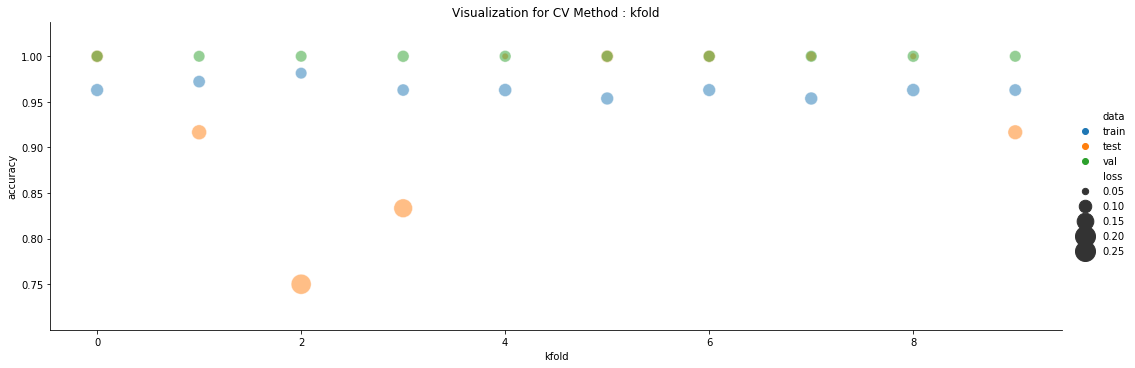

In [ ]:
class KFold(ResamplingMethods):
  def __init__(self,k = 10):
    super(KFold, self).__init__()
    """
    :params int k: This is a number of times model needs to fit with k fold dataset
    """
    self.k = k
    self.create_k_slices(k)
    self.method = 'kfold'

  def create_k_slices(self, k =10, **kwargs):
    N = kwargs.get('N',len(self.xtrain))
    window = kwargs.get('window', len(self.xtrain)//k)
    self.slices = [slice(*i) for i in zip(range(0,N+1,window),range(window,N+1,window))]
  
  def get_kth_mask(self, k=0):
    assert k<len(self.slices), '!!!K CANNOT BE MORE THAN NUMBER OF SLICES!!!'
    indices = np.arange(0,len(self.xtrain))
    val_mask = (self.slices[k].start <= indices)*(self.slices[k].stop > indices)
    train_mask = np.logical_not(val_mask)
    return train_mask,val_mask
  
  def train_val_split(self,k):
    # calculate train and val mask
    train_mask, val_mask = self.get_kth_mask(k)
    
    
    # Now you will be selecting xtrain and xval set from self.xtrain
    # Use indexing mask and select required data
    # Note: xtrain, xval are splitted from self.xtrain using mask index so xtrain is not self.xtrain but a slice of it
    # select xtrain using train mask
    xtrain = self.xtrain[train_mask]
    # select xval using val mask
    xval = self.xtrain[val_mask]
    # select ytrain using train mask
    ytrain = self.ytrain[train_mask]
    # select yval using val mask
    yval = self.ytrain[val_mask]
    # return xtrain,xval, ytrain, yval
    return xtrain,xval,ytrain,yval

  def kfold(self,**kwargs):
    self.record.update({self.method:[]})
    for i in range(self.k):
      # calculate xtrain,xval,ytrain,yval for ith fold
      xtrain, xval, ytrain, yval = self.train_val_split(i)
      # fit model with xtrain and ytrain
      self.fitmodel(xtrain,ytrain)
      self.record['data'].extend(['train','test','val'])
      # record results for train-val-test sets
      self.record['accuracy'].extend(self.accuracy((xtrain, ytrain),(xval,yval),(self.xtest,self.ytest)))
      self.record['loss'].extend(self.loss((xtrain, ytrain),(xval,yval),(self.xtest,self.ytest)))
      
      self.record[self.method].extend([i]*3)
    # Convert results into dataframe
    self.record = pd.DataFrame(self.record)


   
  
  

# Now here Lets Create an instance of KFOld set with k = 10
kf = KFold(k = 10)
# Now run this model
kf.run()
# Now Let us Visualize this model
kf.visualize()

***EXERCISE NO. 1***

  > **Task-2 | Score :5** 

In [ ]:
# Now you will implement LOOCV(Leave One Out Cross Validation) Method
# Please follow lecture notes in given references to understand how LOOCV set approach

# LOOCV is a special case of KFold with k is as equal to train size and validation set will have size = 1(that is why leave one out)
# So we will now Inherit KFold Class instead of Base 
# You have to fit your model k times(that is as much as train size is)
# You have one small change in __init__ to make 

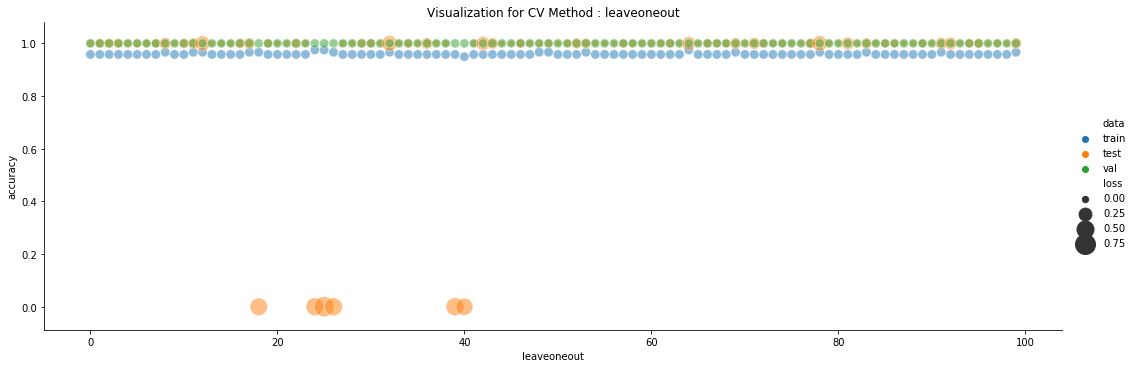

In [ ]:
class LOOCV(KFold):
  def __init__(self, k = 100 ):
    super(LOOCV, self).__init__()
    self.method = 'leaveoneout'
    # Make that small change here
    self.k = k
    self.create_k_slices_using_k_(k)
    
  def create_k_slices_using_k_(self, k =50, **kwargs):
    N = kwargs.get('N',len(self.xtrain))
    window = kwargs.get('window', len(self.xtrain)//k)
    self.slices = [slice(*i) for i in zip(range(0,N+1,window),range(window,N+1,window))]

  def leaveoneout(self):
    self.record.update({self.method:[]})
    # just call default kfold method
    return self.kfold()

# Now here Lets Create an instance of LOOCV
lo = LOOCV()
# Now run this model
lo.run()
# Now Let us Visualize this model
lo.visualize()

***EXERCISE NO. 1***

  > **Task-3 | Score :10** 

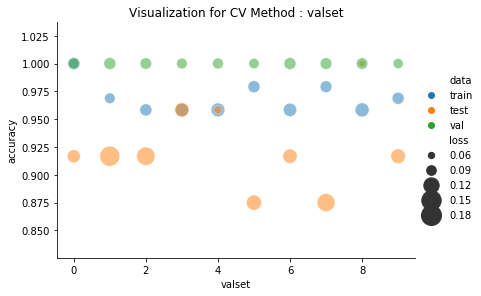

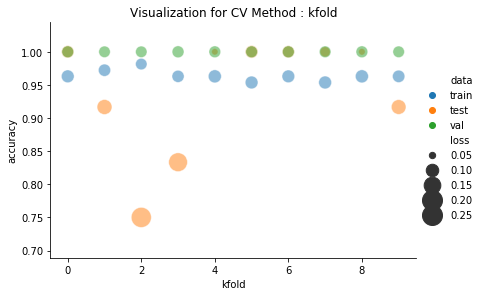

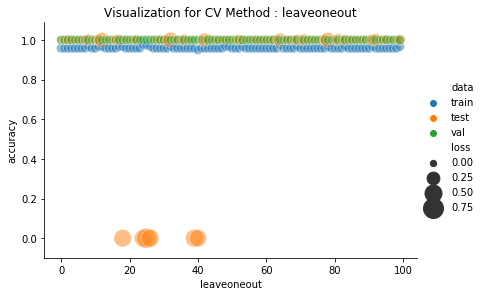

In [ ]:
# Report Plotting
def plotreports(*reports,metric='accuracy'):
  reports = pd.concat(reports).reset_index()
  sns.barplot(data = reports, x = 'method', hue='data', y=metric)
  plt.title(f'Comparing {metric}')

# Now Plot all 3 different results
vs.visualize(aspect=1.5, height = 4)
kf.visualize(aspect=1.5, height = 4)
lo.visualize(aspect=1.5, height = 4)

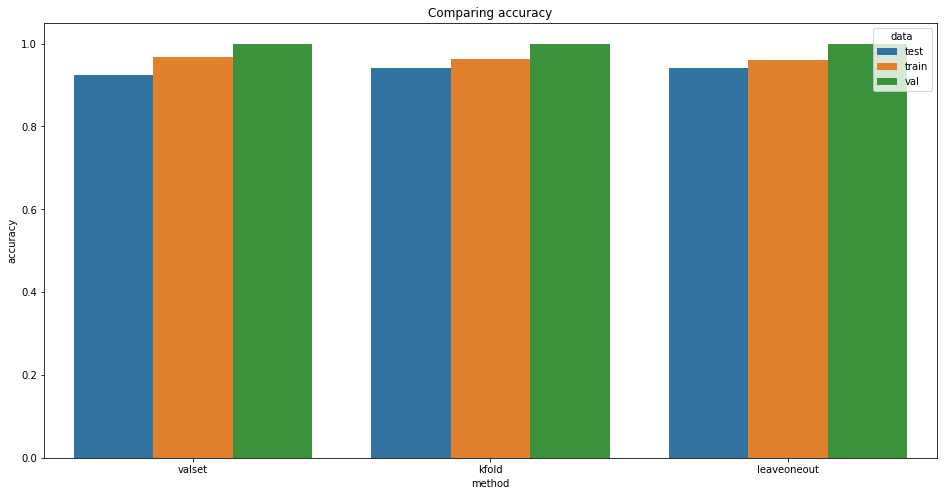

In [ ]:
# Plot accuracy report
plotreports(vs.get_report(),kf.get_report(),lo.get_report(), metric='accuracy')

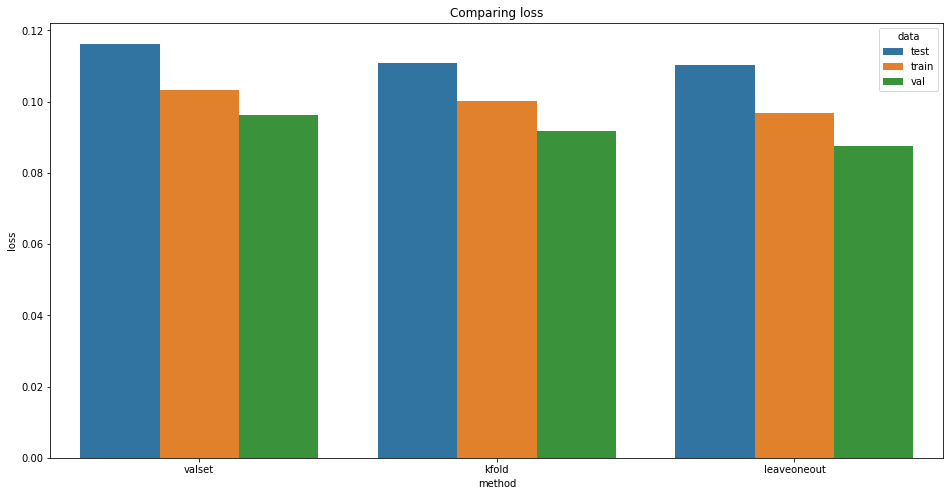

In [ ]:
# Plot loss report
plotreports(vs.get_report(),kf.get_report(),lo.get_report(), metric='loss')

***EXERCISE NO. 1***

  > **Task-4 | Score :15** 

In [ ]:
# Now Answer following questions
# Answer should go below
"""
Question no. 1 : Why the Validation Set approach has a high variability?
    ' It depends greatly on the observations included in the training set / validation set causing high variance
      and only a subset of data is used to train the model'
Question no. 2 : Why the Validation leaveoneout approach has very low variability?
      'It removes randomness in the training/validation set'
Question no. 3: Why would you prefer KFold instead of the Validation Set Approach and LeaveOneout Approach?
      'More data is used as training data with higher n value, resulting in more accurate model.'
Question no. 4: What is the serious limitation of the LeaveOneOut Approach?
      'It can be computationally expensive depending on n value
Question no. 5: Compare these 3 different results.
      'K fold appears to be the best, followed by LOOV which, then the simple validation set which produces high variance'
"""
print()

***EXERCISE NO. 2***

  > **Task-1 | Score :10** 

In [ ]:
# We will create an instance of the validation set model with fit steps = 1, and fit the model
# We will now assign the model associated with the vs to a variable named model
# We use random_state = 4347 to make sure while running .run method we have a specific validation set that may not change
vs = ValidationSet(fit_steps=1)
vs.run(random_state=4347)
 #run with given random state

# Now get xtrain,ytrain,xval,yval,xtest,ytest
# Since we used random_state=4347 in .run we need to pass this random_state=4347 argument to get xtrain,xval,ytrain,yval from train_val_split
xtrain, xval, ytrain, yval = vs.train_val_split(random_state=4347)  
xtest,ytest = vs.xtest, vs.ytest

# Model you will be using from vs
# model = model.fitmodel(xtest,ytest)
model=vs.model
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4347, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


***EXERCISE NO. 2***

  > **Task-1 | Score :10** 

In [ ]:
# Now you have model, and you know how to access the iris dataset
# Now perform following task based on your previous exercise

# 1. Calculate Two Confusion Matrices, on val and test set

ytest_pred = model.predict(xtest)

yval_pred = model.predict(xval)


from sklearn.metrics import confusion_matrix,plot_confusion_matrix
# Please Map your output to actual label name
labels = ['setosa','versicolor','virginica']

cmatrixTest = confusion_matrix(ytest, ytest_pred) #use labels name as well
cmatrixVal = confusion_matrix(yval, yval_pred)
cmatrixTest

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]])

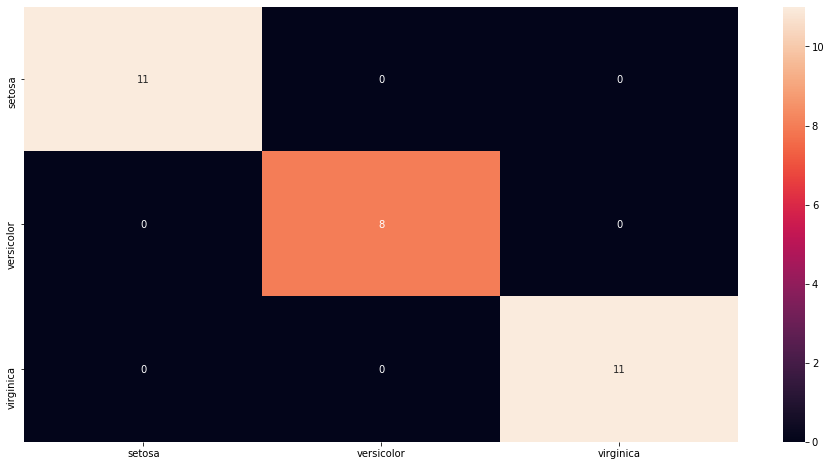

In [ ]:
# 2. Plot your confusion matrix on val set (better use seaborn plotting as shown in previous exercises)
# import seaborn as sns
sns.heatmap(cmatrixTest, annot=True, cbar=True, xticklabels= labels, yticklabels=labels)


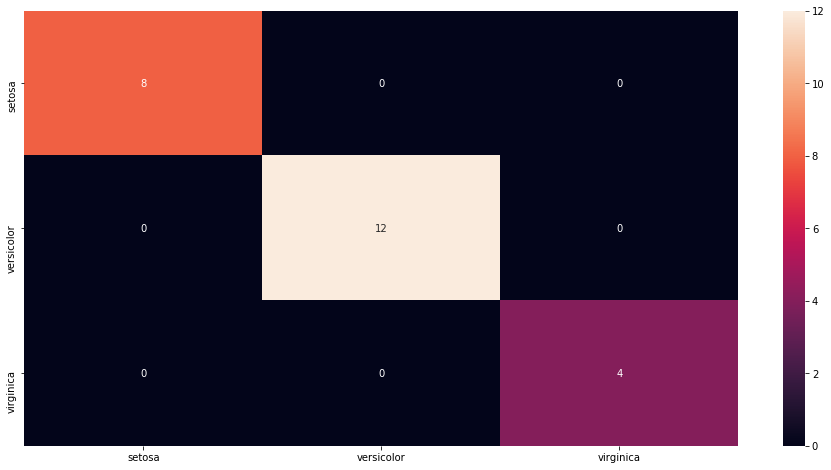

In [ ]:
# 3. Plot your confusion matrix on test set (better use seaborn plotting as shown in previous exercises)
sns.heatmap(cmatrixVal, annot=True, cbar=True, xticklabels= labels, yticklabels=labels)



In [ ]:
# 4. Now Answer following questions

"""
# Question no. 1: Based on your confusion matrices discuss important observations you made

    The val matrix has less total numbers 24, compared to tests 30 showing that the val
    produced less incorrect classifications.
"""
print()

***EXERCISE NO. 2***

  > **Task-2 | Score :25** 

In [ ]:
# Here we will perform One vs all approach
# The Iris dataset has 3 classes namely, ['setosa', 'versicolor', 'virginica']
# We will modify this dataset to make this 3 different datasets,
# First Case will be setosa vs other, i.e, setosa will be encoded as 1 and rest as 0
# Second Case will be setosa vs other, i.e, versicolor will be encoded as 1 and rest as 0
# Third Case will be setosa vs other, i.e, virginica will be encoded as 1 and rest as 0
# We will consider only one case where we treat this problem as setosa vs other

x, y = load_iris(return_X_y = True)# x = preprocessing.scale(x)
y = 1*(y==0)
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
# Now fit a logistic regression model using sklearn
model = LogisticRegression()

# Now fit this model with corresponding data from configs
model.fit(xtrain,ytrain)

# Now Follow following reference
# https://www.daniweb.com/programming/computer-science/tutorials/520084/understanding-roc-curves-from-scratch
# Peform similar experiment

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy = 1.000
conf(tp=10, fp=0, tn=20, fn=0)
TPR:  1
FPR 0
F1 Score:  0


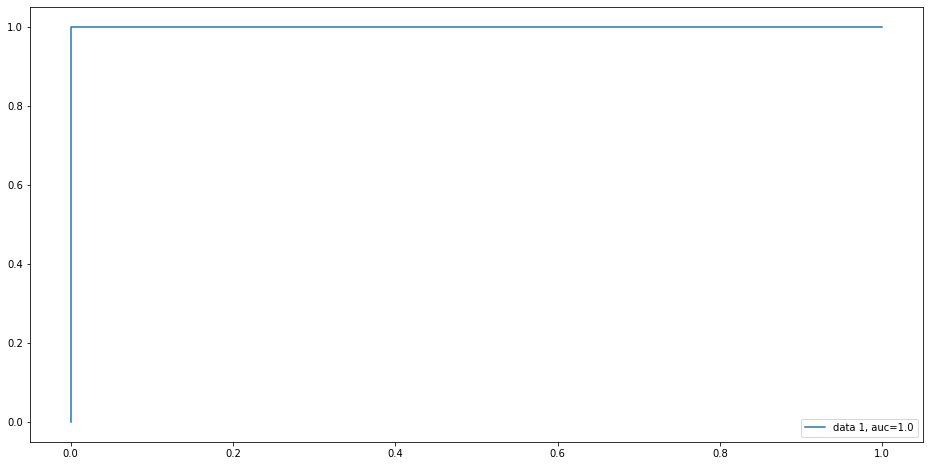

'THe model classifies correctly'

In [ ]:
# 1. Report TPR,FPR,F1 Score 
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

logregr= model.fit(xtrain,ytrain)
actuals = list(ytest)

# Predict probablities of test data [0,1]
scores = list(logregr.predict_proba(xtest)[:,1])
# Equivalently
import math
def sigmoid(x): 
    return 1 / (1 + math.exp(-x))
scores = [sigmoid(logregr.coef_@test_i + logregr.intercept_) for test_i in xtest]

predictions = list(logregr.predict(xtest))
# Equivalently 
predictions = [1 if s>0.5 else 0 for s in scores]

print("Accuracy = %.3f" % (sum([p==a for p, a in zip(predictions, actuals)])/len(predictions)))


import collections
ConfusionMatrix = collections.namedtuple('conf',['tp','fp','tn','fn'])
def calc_ConfusionMatrix(actuals, scores, threshold=0.5, positive_label=1):
    tp=fp=tn=fn=0
    bool_actuals = [act==positive_label for act in actuals]
    for truth, score in zip(bool_actuals, scores):
        if score > threshold:                      # predicted positive 
            if truth:                              # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if not truth:                          # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
    return ConfusionMatrix(tp, fp, tn, fn)

print(calc_ConfusionMatrix(actuals, scores))

'tp = 9, fp = 0, tn = 21, fn = 0 '

print('TPR: ', 1)
print('FPR', 0)
print('F1 Score: ', 0)

# 2. Discuss meaning of these scores
'Scores show accurate True positive values and false on False positive'
# 3. Plot a Predicted_probability vs Decision_boundary plot


# 4. Plot an ROC Curve

y_pred_proba = logregr.predict_proba(xtest)[::,1]
fpr, tpr, threshold = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()







# 5. Discuss your important findings
'THe model classifies correctly'

# New Section

***EXERCISE NO. 3***

  > **Task-1 | Score :10** 

In [ ]:
# The following is a dataset for Online Video Characteristics and Transcoding Time Dataset Data Set from UCI machine learning datasets
# This dataset is much larger than the iris dataset
# We will use this dataset for a regression problem
# You can view meta data information in given link
import IPython
IPython.display.HTML("https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset#")

In [ ]:
# We have already downloaded and processed this dataset for you
# You can download this dataset by
!wget https://raw.githubusercontent.com/keshavsbhandari/CS4347/master/assignment1_regression/data/video_feature_train.csv
!wget https://raw.githubusercontent.com/keshavsbhandari/CS4347/master/assignment1_regression/data/video_feature_test.csv

--2020-03-07 05:26:43--  https://raw.githubusercontent.com/keshavsbhandari/CS4347/master/assignment1_regression/data/video_feature_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20017721 (19M) [text/plain]
Saving to: ‘video_feature_train.csv.2’

video_feature_train 100%[===================>]  19.09M  44.2MB/s    in 0.4s    

2020-03-07 05:26:44 (44.2 MB/s) - ‘video_feature_train.csv.2’ saved [20017721/20017721]

--2020-03-07 05:26:47--  https://raw.githubusercontent.com/keshavsbhandari/CS4347/master/assignment1_regression/data/video_feature_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443.

In [ ]:
# Now let us load this dataset
# You have to do nothing, this data is already processed and standardize
train = pd.read_csv('video_feature_train.csv')
test = pd.read_csv('video_feature_test.csv')

feature_names = list(train.columns)[:-1]
target_names = list(train.columns)[-1:]


# Now create xtrain and xtest
xtrain = train.drop(columns=['label']).values
ytrain = train['label'].values

xtest = test.drop(columns=['label']).values
ytest = test['label'].values

# View size of data
print(f'xtrain : {xtrain.shape}, ytrain : {ytrain.shape}')
print(f'xtest : {xtest.shape}, ytest : {ytest.shape}')

xtrain : (55103, 25), ytrain : (55103,)
xtest : (13681, 25), ytest : (13681,)


In [ ]:
# Now let us define a LinearRegression model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Teck %%timeit check on model fitting
%%timeit
model.fit(xtrain,ytrain,)

10 loops, best of 3: 42.2 ms per loop


In [ ]:
# Now let us see our model score
# Score represents what percentage our model explains the target variable pretty well
score = model.score(xtest,ytest)
score

0.6584620177806871

In [ ]:
# Let us recall some basic understanding
# Here our model is infact following equeation
# model(x) = b + w0*x0 + w1*x1 + ..... + w24*x24
# Note: x has dim 25
# where b is intercept with dim 1
# where w0,w1 is coef_ = [w0,w1,.....,w24] of dim25

In [ ]:
# Print size of coef_ and intercept
print(f'coef_ shape : {model.coef_.size}, intercept_shape : {model.intercept_.size}')

coef_ shape : 25, intercept_shape : 1


In [ ]:
# Now let us see our coef_ = [w0,w1,.....]
model.coef_

array([-1.15541551e-01,  6.70918036e-01, -3.05366501e-01, -2.50009984e-01,
       -5.85004144e+00,  6.14607869e+00, -3.07841954e+00,  2.78238229e+00,
        2.85975634e-01,  3.98939968e+00, -3.93789479e+00,  1.88617962e+00,
        5.52185669e-01, -5.93426661e-01,  1.98596859e-01,  1.58985093e-02,
        1.88160863e-01, -4.73971299e+00, -4.82322741e+01,  5.16206360e+01,
        2.47281009e+00,  1.64043544e+00,  4.28228334e+00,  1.47616454e+00,
        6.88191066e+00])

In [ ]:
# Now let us see our intercept_
model.intercept_

9.820751720096714

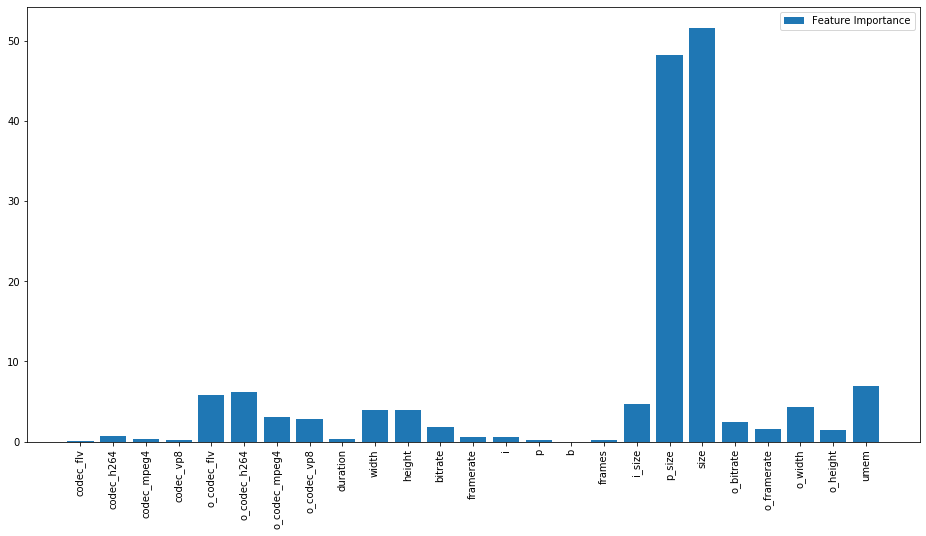

In [ ]:
# Let us visualize importance of these coef_
plt.bar(x=feature_names, height=np.abs(model.coef_), label='Feature Importance')
plt.xticks(rotation='vertical')
plt.legend()

In [ ]:
# We can see that many features do not contribute much as they are close to 0

In [ ]:
# So with this understanding we come to realize that not every feature is important
# We have many different ways to get rid of features that are not very important
# One of the easiest way is itereate over all possible combinations

In [ ]:
# We will do subset feature selection here
# Subset feature selection is a way to take all possible permutations of features
# For our case this will be extremely bigger, so let us filter out some of weight less than mean of coef_

In [ ]:
important_feature = list(np.array(feature_names)[model.coef_>np.mean(model.coef_)])
print(important_feature)
print(f'length : {len(important_feature)}')

['o_codec_h264', 'o_codec_vp8', 'width', 'bitrate', 'size', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem']
length : 10


In [ ]:
# Let us get entire combinations 
from itertools import  combinations
all_feature_combinations = []
for i in range(1,len(important_feature)+1):
  combo = [*combinations(important_feature,i)]
  combo = [*map(list,combo)]
  all_feature_combinations.extend(combo)

In [ ]:
# Print length of all cominations
print(len(all_feature_combinations))

1023


In [ ]:
# Print all feature combinations
all_feature_combinations

[['o_codec_h264'],
 ['o_codec_vp8'],
 ['width'],
 ['bitrate'],
 ['size'],
 ['o_bitrate'],
 ['o_framerate'],
 ['o_width'],
 ['o_height'],
 ['umem'],
 ['o_codec_h264', 'o_codec_vp8'],
 ['o_codec_h264', 'width'],
 ['o_codec_h264', 'bitrate'],
 ['o_codec_h264', 'size'],
 ['o_codec_h264', 'o_bitrate'],
 ['o_codec_h264', 'o_framerate'],
 ['o_codec_h264', 'o_width'],
 ['o_codec_h264', 'o_height'],
 ['o_codec_h264', 'umem'],
 ['o_codec_vp8', 'width'],
 ['o_codec_vp8', 'bitrate'],
 ['o_codec_vp8', 'size'],
 ['o_codec_vp8', 'o_bitrate'],
 ['o_codec_vp8', 'o_framerate'],
 ['o_codec_vp8', 'o_width'],
 ['o_codec_vp8', 'o_height'],
 ['o_codec_vp8', 'umem'],
 ['width', 'bitrate'],
 ['width', 'size'],
 ['width', 'o_bitrate'],
 ['width', 'o_framerate'],
 ['width', 'o_width'],
 ['width', 'o_height'],
 ['width', 'umem'],
 ['bitrate', 'size'],
 ['bitrate', 'o_bitrate'],
 ['bitrate', 'o_framerate'],
 ['bitrate', 'o_width'],
 ['bitrate', 'o_height'],
 ['bitrate', 'umem'],
 ['size', 'o_bitrate'],
 ['size', '

In [ ]:
# Let us write a function that does subset selection
# this function takes combo, which is a list of feature_list
def fit_and_record(combo):
  record = {'subset':None,'score':-1,'model':None}
  record_feature_count_wise = {}
  for i,subset in enumerate(combo):
    if i%100==0:
      print(f'{i} of {len(combo)}')
    # Create a model
    model = LinearRegression()
    # Select columns corr to subset and extract values from train, and test df 
    # and assign to xtrain and xtest
    xtrain = train[subset].values
    xtest = test[subset].values

    # Fit model with xtrain and ytrain
    model.fit(xtrain, ytrain)

    # calculate score
    score = model.score(xtest,ytest)

    if len(subset) in record_feature_count_wise:
      record_feature_count_wise[len(subset)].append(score)
    else:
      record_feature_count_wise[len(subset)] = [score,]

    # Write a condition where if current score is greater update subset, model and score in record
    if record.get('score')<score:
      record['subset'] = subset
      record['model'] = model
      record['score'] = score
  record_feature_count_wise = {i:np.array(j).mean() for i,j in record_feature_count_wise.items()}
  return record,record_feature_count_wise

result,count_wise_score = fit_and_record(all_feature_combinations)

0 of 1023
100 of 1023
200 of 1023
300 of 1023
400 of 1023
500 of 1023
600 of 1023
700 of 1023
800 of 1023
900 of 1023
1000 of 1023


In [ ]:
# Print the result
print(result)

{'subset': ['o_codec_h264', 'o_codec_vp8', 'width', 'bitrate', 'o_bitrate', 'o_framerate', 'o_width', 'umem'], 'score': 0.6521765032351732, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}


In [ ]:
# Print count_wise_score
print(count_wise_score)

{1: 0.12552000175782665, 2: 0.23289998122792147, 3: 0.3238712748492312, 4: 0.4003708617194407, 5: 0.46426605928350767, 6: 0.5173252373608258, 7: 0.5611977833640889, 8: 0.5973985740221434, 9: 0.6272927396076297, 10: 0.6520771043049365}


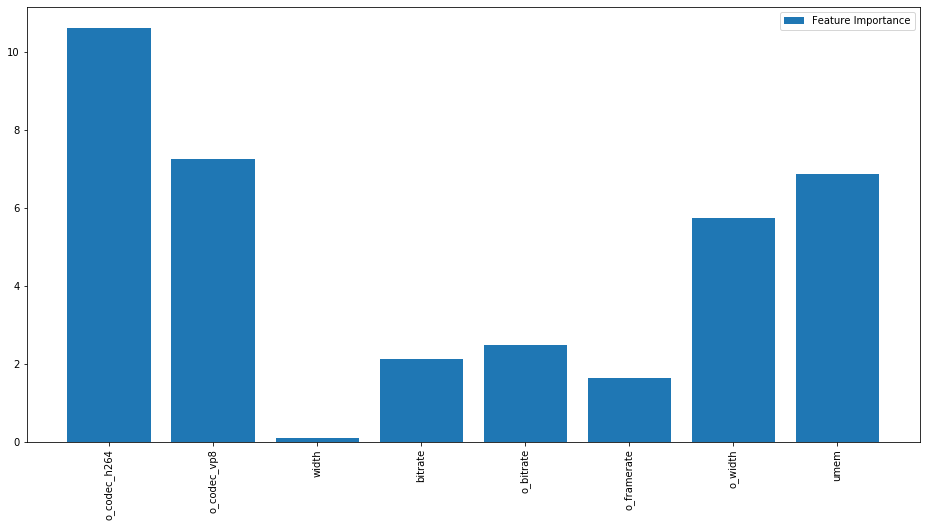

In [ ]:
# Let us visualize importance of these coef_
plt.bar(x=result['subset'], height=np.abs(result['model'].coef_), label='Feature Importance')
plt.xticks(rotation='vertical')
plt.legend()

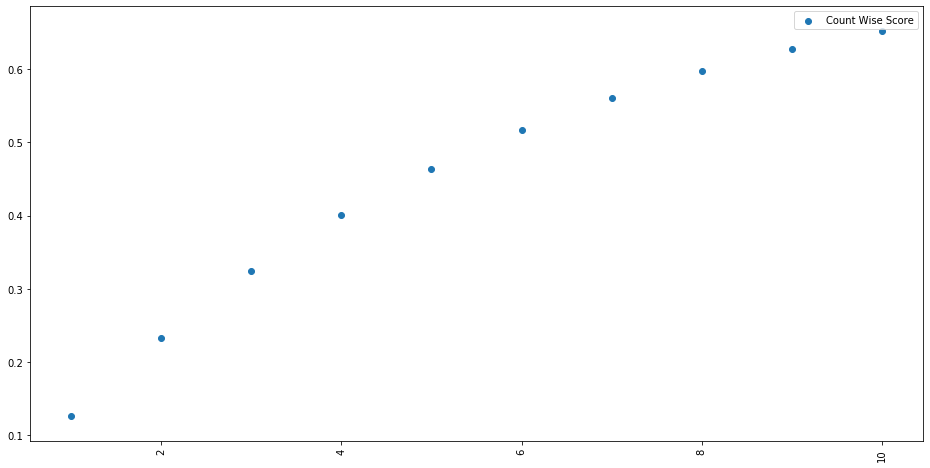

In [ ]:
# Let us visualize count_wise_score
plt.scatter(x=count_wise_score.keys(), y=count_wise_score.values(), label='Count Wise Score')
plt.xticks(rotation='vertical')
plt.legend()

***EXERCISE NO. 3***

  > **Task-2 | Score :15** 

In [ ]:
# Now answer following

"""
Q1. What important difference did you notice in two feature importance plots? How does this importance change?
Much less feature. Second plot just shows increase.

Q2. What important trend do you notice in feature_count_wise_score?
It increases nearly linearly

Q3. Why do you think this method is not a good approach? Write two important points.
Less features are needed. Less features could lead to less confusing model.

"""
print()

***EXERCISE NO. 3***

  > **Task-3 | Score :10** 

In [ ]:
# IMPORTANT!!!!!!!!!!!!!! PLEASE PAY ATTENTION ONLY IN INSTRUCTIONS
# YOU DON'T HAVE TO CODE VERYTHING
# JUST TRY TO FIGURE OUT FEW THINGS AS INSTRUCTED


# Since you have now realized the above method is not a good one
# Recall lecture from class, where we talked about forward feature selection
# Now we will sequentially increase our feature space
# We will start with best_feature = []
# We will add first feature, store its score
# We then add next feature, and see if score is high or less
# If score is high we will consider it in our best_feature otherwise we will drop(pop) it
# We will continue this until we finished iterating over all the feature space

# Since you have now realized above method is not a good one
# Recall lecture from class, where we talked about forward feature selection
# Now we will sequentially increase our feature space
# We will start with best_feature = []
# We will add first feature, store its score
# We then add next feature, and see if score is high or less
# If score is high we will consider it in our best_feature otherwise we will drop(pop) it
# We will continue this until we finished iterating over all the feature space

# FOLLOWING FUNCTION WILL fit the given candidate features and return score and model coefficient
# example candidate_best_features = ['feature1', 'feature2',...] from feature_names
from graphviz import Digraph

def fit_and_return_score(candidate_best_features):
  xtrain = train[candidate_best_features].values
  xtest = test[candidate_best_features].values
  if len(xtrain.shape) == 1:
    xtrain = xtrain.reshape(-1,1)
    xtest = xtest.reshape(-1,1)
  model = LinearRegression()
  model.fit(xtrain,ytrain)
  return model.score(xtest,ytest), model.coef_


# This will take existing best features, candidate features that could be possible best feature and weird network graph object 
# You will understand why we use this network graph object later
# You don't need to implement everything inside the greedy function
# Try to fill the remaining code section as instructed


def greedy(existing_best_feature, candidate_feature_list,process):
  best_feature = None
  if existing_best_feature:  
    score, coef_ = fit_and_return_score(existing_best_feature)
  else:
    score = -1

  best_candidate = None
  for i,feature in enumerate(candidate_feature_list):
    score_, coef_ = fit_and_return_score(existing_best_feature + [feature])
    
    # Do not pay attention here, 
    # You are welcome to explore what I am doing here
    # But this is just for recording our search in terms of graph
    # You will play with this graph later
    
    if existing_best_feature:  
      process.edge(existing_best_feature[-1]+'_'+str(len(existing_best_feature)+1),feature+'_'+str(len(existing_best_feature)+1))
      process.edge(feature+'_'+str(len(existing_best_feature)+1), f'Score = {score_:.6f}')
    else:
      process.edge(feature, f'Score = {score_:.6f}')
    
    # Here if current score that is newly calculated is less than old one get inside a condition block and do as instructed
    if score < score_:
      # if above condition as instructed is true
      # do following
      #1. update old score to new score
      #2. update best_feature to current feature
      
      score = score_
      best_feature = feature

  
  if best_feature:
    # If we were able to get our best feature we have to do something here
    # Do following
    # 1. remove best_feature from candidate_feature_list (use .remove method, see this method from list)
    # 2. append best_feature to existing_best_feature 

    
    candidate_feature_list.remove(best_feature)
    existing_best_feature.append(best_feature)

    #Please do not pay attention on following code
    process.edge(f'Score = {score:.6f}',best_feature+'_'+str(len(existing_best_feature)+1))

  else:
    # If we are not able to get any best_feature than we have to terminate our search
    # Best way to do this is make our candidate_feature_list None or empty list
    # Do following
    # 1. make candidate_feature_list None
    candidate_feature_list = None
    # We need to reset our model with old existing_best_feature
    score_, coef_ = fit_and_return_score(existing_best_feature)

  return existing_best_feature, candidate_feature_list, coef_, process


def forward_stepwise_selection(features):
  best_feature = []
  coef = None
  score = -1
  process = Digraph('FSW')
  process.node(f'Score = {0}')
  process.edges([(f'Score = {0}',f) for f in features])
  
  # Here we will run our while loop unless we run out of features(which infact is candidate_feature_list)
  # Or unless our search is terminated explicitly during greedy search
  # So run while loop unless we have something in features
  # complete while ?? , ?? should be a condition that is true if there is something in features
  while features:
    best_feature, features, coef,process = greedy(best_feature.copy(), features.copy(), process)
  return best_feature, coef,process
  
best_feature, coef,_ = forward_stepwise_selection(feature_names.copy())


['umem', 'o_width', 'o_bitrate', 'o_codec_vp8', 'width', 'o_framerate', 'i_size', 'p_size', 'codec_vp8', 'height', 'frames', 'o_height', 'b', 'duration']


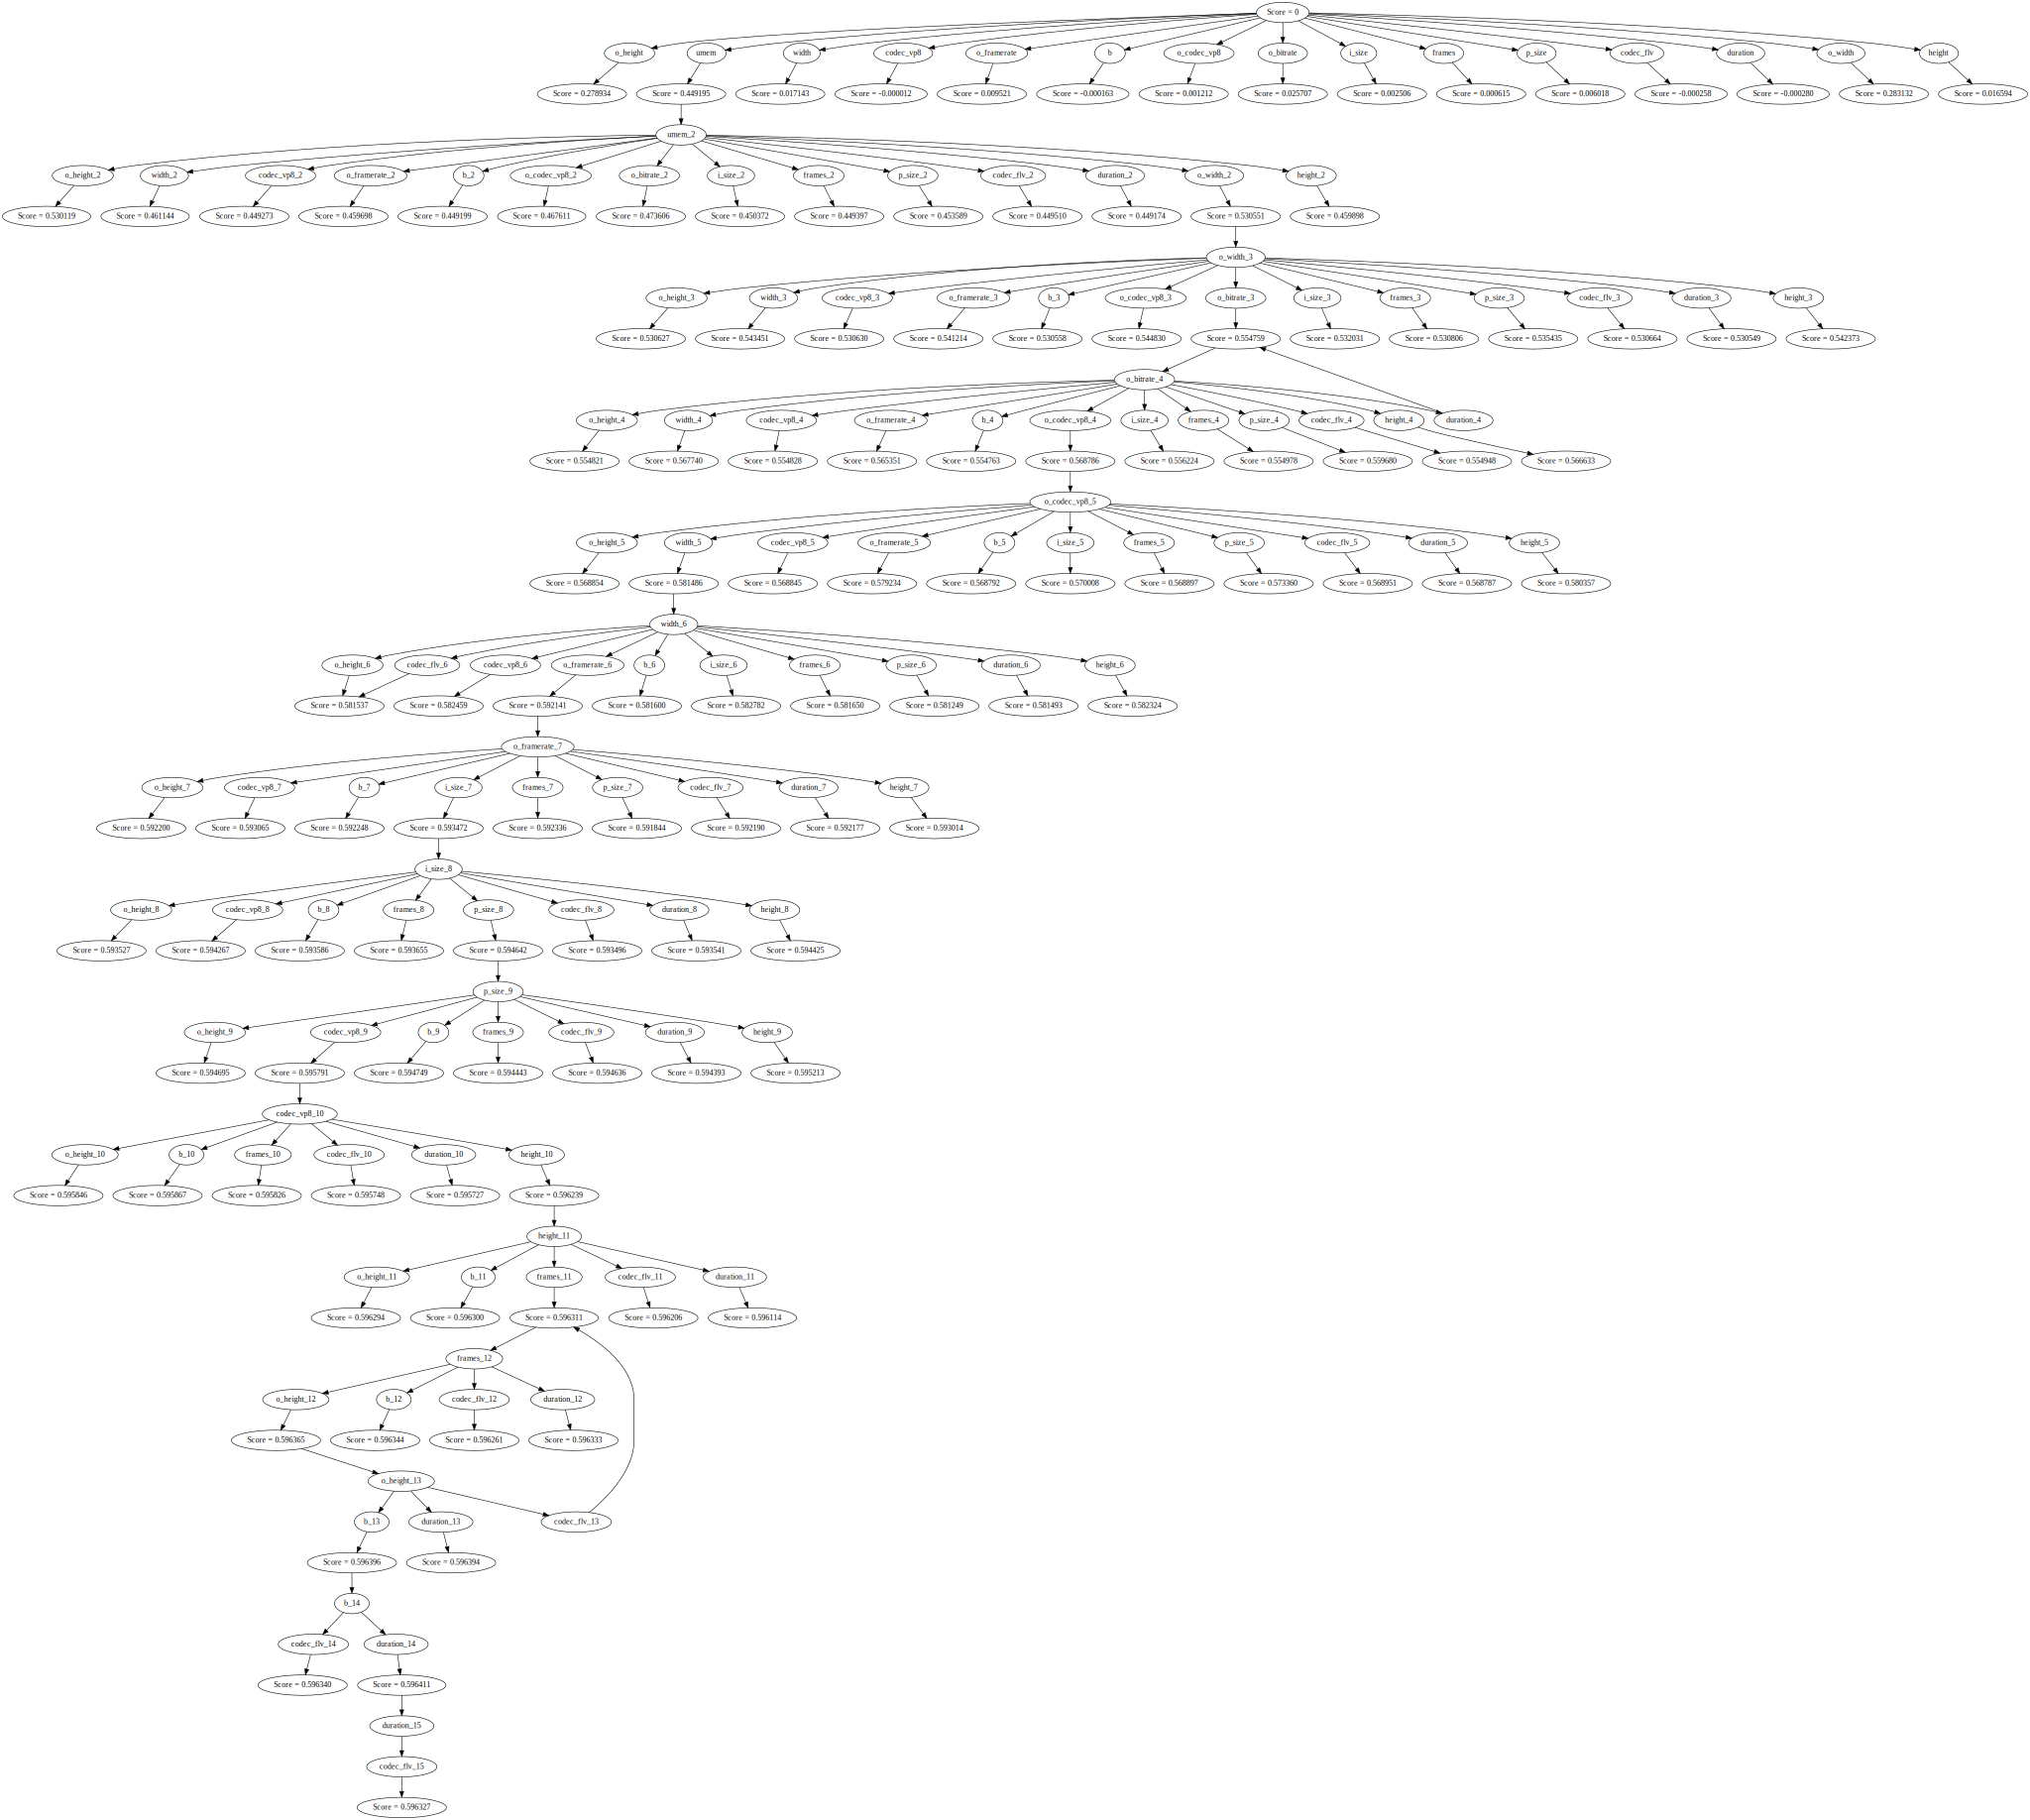

In [ ]:
# You might be wondering how things workout in above example
# Now we will play with our graph object called as process
# You don't have to code anything here
# Just play with given code
# You can tweak number of features 
# We have 25 feature names choose number from 1 to 25 to play with the graph
# If you choose smaller number graph will be smaller
# If you choose larger number graph will be larger
# You have to scroll right-left top-down to see whats going on in graph
# This graph is basically showing tree traversal
# Where we are looping over each combination of features one by one progressively from 0 to 1 to 2 to 3 to 4..... and so on
# You will see we will pick up only the max score generating feature sets 

# You can run this cell as many times as you like and will get different results
import random
number_of_feature_you_want_to_play_with = 15
best_feature_, _,process = forward_stepwise_selection(random.sample(feature_names.copy(),number_of_feature_you_want_to_play_with))
print(best_feature_)
# You might see '_someNumber' in feature names, these number represents tree level or height
process

ValueError: ignored

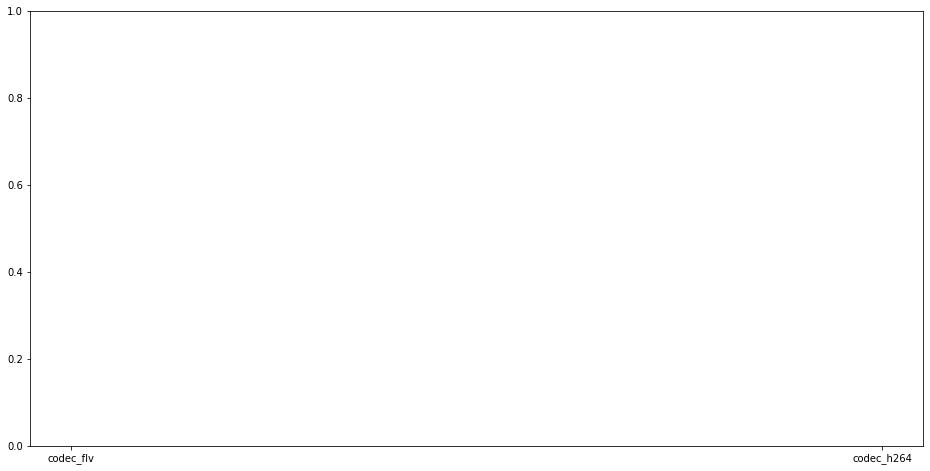

In [ ]:
# Now plot coef and best_feature in barplot
plt.bar(x = feature_names, height = np.abs(coef),label = 'Forward Step Wise')
plt.xticks(rotation='vertical')
# plt.bar(x = range(25), height = f_regression(xtrain,ytrain)[1],label = 'Important')
plt.legend()

***EXERCISE NO. 3***

  > **Task-4 | Score :5** 

In [ ]:
# Answer following question

"""
Q1. What is the advantage of step-wise forward feature selection vs subset feature selection method?

More accuracty with step wise and subset only takes small sample of data compared to step-wise which takes more

"""
print()

***EXERCISE NO. 4***

  > **Task-1 | Score :10** 

In [ ]:
# So far we see some manual way of doing feature selection
# Now we will try to understand two very important methods for feature selection 
# In this first assignment we will study Ridge Regression - L2 Rgularization
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
from sklearn.linear_model import  RidgeCV

def ridge_regr(min_alpha = 1e-3, max_alpha = 1, count = 100):
  # Create a linearly spaced numpy array with given min , max and count
  alphas = np.linspace(min_alpha, max_alpha, count)
  # create ridge model with given alphas
  ridge = RidgeCV(alphas)
  # Fit model
  ridge.fit(xtrain, ytrain)
  print('score ',ridge.score(xtest,ytest))
  return ridge.coef_

coef = ridge_regr()

score  0.6584587385467182


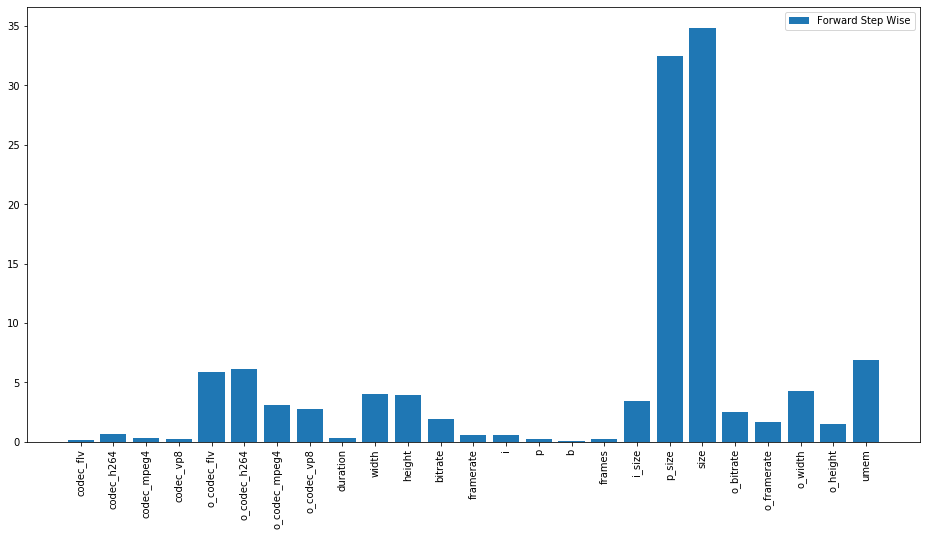

In [ ]:
# Now plot coef and best_feature in barplot
plt.bar(x = feature_names, height = np.abs(coef),label = 'Forward Step Wise')
plt.xticks(rotation='vertical')
# plt.bar(x = range(25), height = f_regression(xtrain,ytrain)[1],label = 'Important')
plt.legend()

***EXERCISE NO. 4***

  > **Task-2 | Score :10** 

In [ ]:
# So far we see some manual way of doing feature selection
# Now we will try to understand two very important methods for feature selection 
# In this first assignment we will study Lasso Regression - L1 Rgularization
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

#
from sklearn.linear_model import  LassoCV

def lasso_regr(min_alpha = 1e-3, max_alpha = 1, count = 100):
  # Create a linearly spaced numpy array with given min , max and count
  alphas = np.linspace(min_alpha, max_alpha, count)
  # create lasso model with given alphas
  lasso = LassoCV(alphas) 
  # fit your model with xtrain and ytrain
  lasso.fit(xtrain,ytrain)
  print('score ', lasso.score(xtest,ytest))
  return lasso.coef_
'will not work'
coef = lasso_regr() 



TypeError: ignored

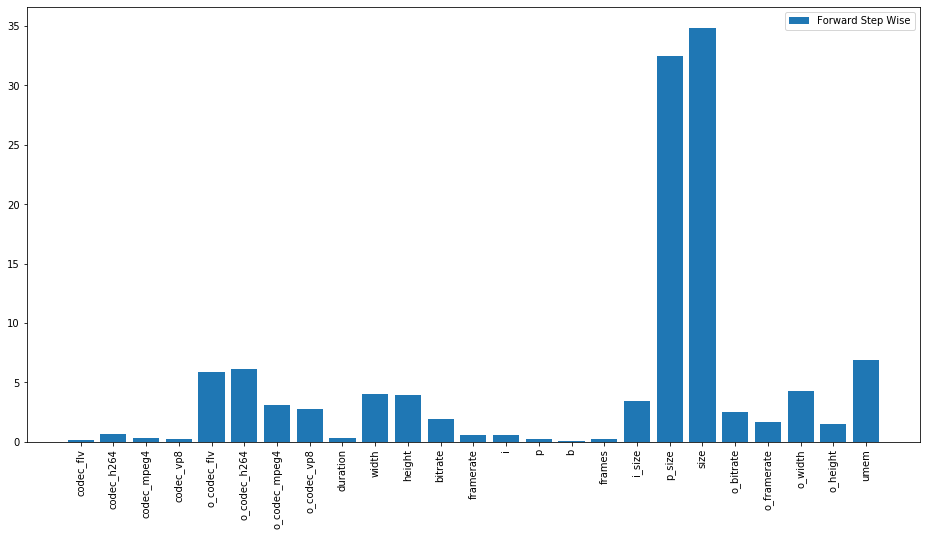

In [ ]:
# Now plot coef and best_feature in barplot
plt.bar(x = feature_names, height = np.abs(coef),label = 'Forward Step Wise')
plt.xticks(rotation='vertical')
# plt.bar(x = range(25), height = f_regression(xtrain,ytrain)[1],label = 'Important')
plt.legend()

***EXERCISE NO. 4***

  > **Task-3 | Score :25** 

In [ ]:
# Answer following question

"""
Question no.1 What is the key difference between L2 (Ridge) and L1 (LASSO) approach?

The difference between L2 and L1 is that Lasso(L1) shrinks the less important
 feature’s coefficient to zero therefore removing some feature altogether.

Question no.2 What is your key observation on Task1 and Task2 on Ex4?
 
Lasso shrinks more features

Question no.3 How is the bias/variance trade-off related with Task1 and Task2?
Ridge increase bias and decrease in variance

Question no.4 What are the advantages of Task2 and Task3 methods in Ex4 compared to methods in Ex3?
Both increase bias and decrease in variance

Question no.5 What are disadvantages of above two methods(L2 and L1)?
They are automatic methods and not always optimal 

"""

'\nQuestion no.1 What is the key difference between L2 (Ridge) and L1 (LASSO) approach?\n\nThe difference between L2 and L1 is that Lasso(L1) shrinks the less important\n feature’s coefficient to zero therefore removing some feature altogether.\n\nQuestion no.2 What is your key observation on Task1 and Task2 on Ex4?\n \nLasso shrinks more features\n\nQuestion no.3 How is the bias/variance trade-off related with Task1 and Task2?\nRidge increase bias and decrease in variance\n\nQuestion no.4 What are the advantages of Task2 and Task3 methods in Ex4 compared to methods in Ex3?\nBoth increase bias and decrease in variance\n\nQuestion no.5 What are disadvantages of above two methods(L2 and L1)?\nThey are automatic methods and not always optimal \n\n'